# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

# Keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import pathlib

# Dataset

In [2]:
data_dir = pathlib.Path('App/res/images_AI/')

image_count = len(list(data_dir.glob('*/*.png')))
print(f"The number of images is :{image_count}")


The number of images is :80


# Creating a dataset for Keras

In [3]:
# Parametres
batch_size = 32
img_height = 160
img_width = 160

input_shape=(img_height, img_width, 3)


# Training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


# Validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 80 files belonging to 20 classes.
Using 64 files for training.
Found 80 files belonging to 20 classes.
Using 16 files for validation.


## Checking classes

In [4]:
class_names = train_ds.class_names
print(class_names)

['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '3', '4', '5', '6', '7', '8', '9']


# Visualize the data

In [5]:
#plt.figure(figsize=(10, 10))
#for images, labels in train_ds.take(1):
#  for i in range(9):
#    ax = plt.subplot(3, 3, i + 1)
#    plt.imshow(images[i].numpy().astype("uint8"))
#    plt.title(class_names[labels[i]])
#    plt.axis("off")

## Manual retrieving of images by batch

In [6]:
#for image_batch, labels_batch in train_ds:
#  print(image_batch.shape)
#  print(labels_batch.shape)
#  break

## Performance

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Data normalization example

In [8]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [9]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# Model creation

In [10]:
num_classes = 20

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

## Compile the model

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# model.summary()

# Model training

In [13]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
2/2 [==============================] - 1s 404ms/step - loss: 3.8831 - accuracy: 0.0156 - val_loss: 3.4197 - val_accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 309ms/step - loss: 3.0086 - accuracy: 0.0781 - val_loss: 2.9555 - val_accuracy: 0.1250
Epoch 3/10
2/2 [==============================] - 1s 317ms/step - loss: 2.9957 - accuracy: 0.0938 - val_loss: 2.9746 - val_accuracy: 0.1250
Epoch 4/10
2/2 [==============================] - 1s 283ms/step - loss: 2.9405 - accuracy: 0.2031 - val_loss: 3.0025 - val_accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 292ms/step - loss: 2.8916 - accuracy: 0.1562 - val_loss: 3.0270 - val_accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 1s 268ms/step - loss: 2.8345 - accuracy: 0.1406 - val_loss: 3.0645 - val_accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 1s 281ms/step - loss: 2.7714 - accuracy: 0.2031 - val_loss: 3.1066 - val_accuracy: 0.0000e+00


# Visualize training results

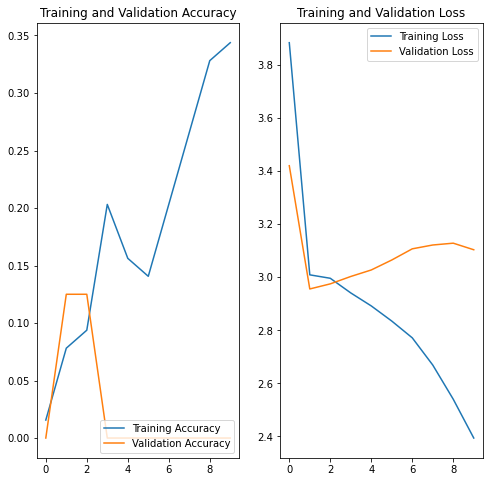

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Data augmentation

In [15]:
data_augmentation = Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=input_shape),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ])

NotImplementedError: Cannot convert a symbolic Tensor (random_rotation/rotation_matrix/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

# Dropout without data augmentation

# Dropout with Data augmentation

In [ ]:
num_classes = 20

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Recompiling the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

## Retraining the model

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

# Visualize the new results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Testing the model

In [ ]:
img_dir = "App/res/images_AI/"
img_names = {'green.png', 'purple.png', 'red.png', 'yellow.png'}

# images vars
#img_dir = "App/res/images/";
#img_names = {'jaune.png', 'rouge.png', 'vert.jpg', 'violet.png'}

for i in range(1, 21):
    for name in img_names: 
    
      img = keras.preprocessing.image.load_img(
          img_dir + str(i) + '/' + str(i) + name, target_size=(img_height, img_width)
      )

      # draw the chart containing the image with boxes
      #plt.imshow(img)
      #plt.title(name)
      #plt.show()
        
      img_array = keras.preprocessing.image.img_to_array(img)
      img_array = tf.expand_dims(img_array, 0) # Create a batch

      predictions = model.predict(img_array)
      score = tf.nn.softmax(predictions[0])

      print(
          "This image most likely belongs to {} with a {:.2f} percent confidence."
          .format(class_names[np.argmax(score)], 100 * np.max(score))
      )

# OLD THINGS TO TEST MAYBE